In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('tit.csv')

In [5]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [24]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [25]:
216/891

0.24242424242424243

In [26]:
a = data['Age']

In [27]:
a

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [28]:
a.dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [29]:
a.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [30]:
ages = a.dropna()

In [31]:
ages

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [32]:
ages.mean()

29.69911764705882

In [33]:
ages.median()

28.0

In [34]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [36]:
data['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [38]:
cor = data['Parch'].corr(data['SibSp'])

In [39]:
cor

0.4148376986201567

In [44]:
data['Name'][0]

'Braund, Mr. Owen Harris'

In [48]:
data['Name'].head(30)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [47]:
import re

In [49]:
def clean_name(name):
 
    # Первое слово до запятой - фамилия
    s = re.search('^[^,]+, (.*)', name)
    if s:
        name = s.group(1)
 
    # Если есть скобки - то имя пассажира в них
    s = re.search('\(([^)]+)\)', name)
    if s:
        name = s.group(1)
    # Удаляем обращения
    name = re.sub('(Miss\. |Mrs\. |Ms\. )', '', name)
    # Берем первое оставшееся слово и удаляем кавычки
    name = name.split(' ')[0].replace('"', '')
    return name
 
names = data[data['Sex'] == 'female']['Name'].map(clean_name)
name_counts = names.value_counts()

In [51]:
name_counts

Mary         15
Anna         15
Elizabeth    11
Margaret     10
Alice         6
             ..
Phyllis       1
Banoura       1
Elin          1
Lutie         1
Farnham       1
Name: Name, Length: 178, dtype: int64

In [14]:
import numpy as np

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
DTR = DecisionTreeClassifier(random_state=42)

In [18]:
X = np.array([[2,3,4],[6,7,8],[4,3,2]])

In [25]:
y = np.array([4,2,3000])

In [26]:
DTR.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [27]:
DTR.predict(X)

array([   4,    2, 3000])

In [90]:
imprt = DTR.feature_importances_()

In [91]:
imprt

array([0. , 0.5, 0.5])

In [92]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [125]:
df = data.loc()[:,['Survived','Pclass','Sex','Age','Fare']]

In [126]:
df

Survived  Pclass     Sex   Age     Fare
0           0       3    male  22.0   7.2500
1           1       1  female  38.0  71.2833
2           1       3  female  26.0   7.9250
3           1       1  female  35.0  53.1000
4           0       3    male  35.0   8.0500
..        ...     ...     ...   ...      ...
886         0       2    male  27.0  13.0000
887         1       1  female  19.0  30.0000
888         0       3  female   NaN  23.4500
889         1       1    male  26.0  30.0000
890         0       3    male  32.0   7.7500

[891 rows x 5 columns]

In [104]:
y = data['Survived']

In [105]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [110]:
df.isna

<bound method DataFrame.isna of      Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
886       2    male  27.0  13.0000
887       1  female  19.0  30.0000
888       3  female   NaN  23.4500
889       1    male  26.0  30.0000
890       3    male  32.0   7.7500

[891 rows x 4 columns]>

In [111]:
df

Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
886       2    male  27.0  13.0000
887       1  female  19.0  30.0000
888       3  female   NaN  23.4500
889       1    male  26.0  30.0000
890       3    male  32.0   7.7500

[891 rows x 4 columns]

In [127]:
df = df.dropna(how='any')

In [128]:
df

Survived  Pclass     Sex   Age     Fare
0           0       3    male  22.0   7.2500
1           1       1  female  38.0  71.2833
2           1       3  female  26.0   7.9250
3           1       1  female  35.0  53.1000
4           0       3    male  35.0   8.0500
..        ...     ...     ...   ...      ...
885         0       3  female  39.0  29.1250
886         0       2    male  27.0  13.0000
887         1       1  female  19.0  30.0000
889         1       1    male  26.0  30.0000
890         0       3    male  32.0   7.7500

[714 rows x 5 columns]

In [123]:
DTC = DecisionTreeClassifier(random_state=241)

In [129]:
df

Survived  Pclass     Sex   Age     Fare
0           0       3    male  22.0   7.2500
1           1       1  female  38.0  71.2833
2           1       3  female  26.0   7.9250
3           1       1  female  35.0  53.1000
4           0       3    male  35.0   8.0500
..        ...     ...     ...   ...      ...
885         0       3  female  39.0  29.1250
886         0       2    male  27.0  13.0000
887         1       1  female  19.0  30.0000
889         1       1    male  26.0  30.0000
890         0       3    male  32.0   7.7500

[714 rows x 5 columns]

In [130]:
y = df['Survived']

In [131]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [134]:
df = df.loc()[:,['Pclass','Sex','Age','Fare']]

In [135]:
df

Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
885       3  female  39.0  29.1250
886       2    male  27.0  13.0000
887       1  female  19.0  30.0000
889       1    male  26.0  30.0000
890       3    male  32.0   7.7500

[714 rows x 4 columns]

In [136]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

ValueError: could not convert string to float: 'male'

In [138]:
ва

NameError: name 'ва' is not defined

In [139]:
df

Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
885       3  female  39.0  29.1250
886       2    male  27.0  13.0000
887       1  female  19.0  30.0000
889       1    male  26.0  30.0000
890       3    male  32.0   7.7500

[714 rows x 4 columns]

In [140]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
885    female
886      male
887    female
889      male
890      male
Name: Sex, Length: 714, dtype: object

In [141]:
df['Sex'] = df['Sex'].map(lambda sex: 1 if sex=='male'else 0 )

In [142]:
df

Pclass  Sex   Age     Fare
0         3    1  22.0   7.2500
1         1    0  38.0  71.2833
2         3    0  26.0   7.9250
3         1    0  35.0  53.1000
4         3    1  35.0   8.0500
..      ...  ...   ...      ...
885       3    0  39.0  29.1250
886       2    1  27.0  13.0000
887       1    0  19.0  30.0000
889       1    1  26.0  30.0000
890       3    1  32.0   7.7500

[714 rows x 4 columns]

In [143]:
DTC.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=241, splitter='best')

In [145]:
DTC.predict(df)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [147]:
imp = DTC.feature_importances_

In [148]:
imp

array([0.14000522, 0.30051221, 0.2560461 , 0.30343647])

In [153]:
importances = pd.Series(DTC.feature_importances_)

In [154]:
importances

0    0.140005
1    0.300512
2    0.256046
3    0.303436
dtype: float64

In [1]:
data_wine = pd.read_csv("wine.data")

NameError: name 'pd' is not defined

In [97]:
import pandas as pd


In [98]:
data_wine = pd.read_csv("wine.data")

In [99]:
data_wine

1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  \
0    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
1    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
2    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
3    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
4    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
172  3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
173  3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
174  3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
175  3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
176  3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

     3.92  1065  
0    3.40  1050  
1    3.17  1185  
2    3.45  1480  
3    2.93   735  
4    2.85  1450  
..    ...   ...  
172  1.74   740  
173  1.56   750  
174  1.56   835  
175  1.62   840  
176  1.60   560  

[177 rows x 14 columns]

In [100]:
data_wine[:]

1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  \
0    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
1    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
2    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
3    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
4    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
172  3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
173  3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
174  3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
175  3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
176  3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

     3.92  1065  
0    3.40  1050  
1    3.17  1185  
2    3.45  1480  
3    2.93   735  
4    2.85  1450  
..    ...   ...  
172  1.74   740  
173  1.56   750  
174  1.56   835  
175  1.62   840  
176  1.60   560  

[177 rows x 14 columns]

In [101]:
data_wine[:1]

1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  \
0  1   13.2  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05   3.4   

   1065  
0  1050

In [102]:
data_wine["1"]

0      1
1      1
2      1
3      1
4      1
      ..
172    3
173    3
174    3
175    3
176    3
Name: 1, Length: 177, dtype: int64

In [103]:
class_wine = data_wine["1"]

In [104]:
class_wine

0      1
1      1
2      1
3      1
4      1
      ..
172    3
173    3
174    3
175    3
176    3
Name: 1, Length: 177, dtype: int64

In [105]:
data_wine

1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  \
0    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
1    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
2    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
3    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
4    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
172  3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
173  3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
174  3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
175  3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
176  3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

     3.92  1065  
0    3.40  1050  
1    3.17  1185  
2    3.45  1480  
3    2.93   735  
4    2.85  1450  
..    ...   ...  
172  1.74   740  
173  1.56   750  
174  1.56   835  
175  1.62   840  
176  1.60   560  

[177 rows x 14 columns]

In [106]:
y = class_wine

In [107]:
y

0      1
1      1
2      1
3      1
4      1
      ..
172    3
173    3
174    3
175    3
176    3
Name: 1, Length: 177, dtype: int64

In [108]:
X = data_wine.iloc[:,1:]

In [109]:
X

14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  3.92  \
0    13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
1    13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
2    14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
3    13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
4    14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05  2.85   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
172  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
173  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
174  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
175  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60  1.62   
176  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61  1.60   

     1065  
0    1050  
1    1185  
2    1480  
3     735  
4    1450  
..    ...  
172   740  
173   750  
174   835  
175   840  
176   560  

[177 rows x 13 columns]

In [110]:
y

0      1
1      1
2      1
3      1
4      1
      ..
172    3
173    3
174    3
175    3
176    3
Name: 1, Length: 177, dtype: int64

In [111]:
X

14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  3.92  \
0    13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
1    13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
2    14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
3    13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
4    14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05  2.85   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
172  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
173  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
174  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
175  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60  1.62   
176  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61  1.60   

     1065  
0    1050  
1    1185  
2    1480  
3     735  
4    1450  
..    ...  
172   740  
173   750  
174   835  
175   840  
176   560  

[177 rows x 13 columns]

In [112]:

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


In [113]:
from sklearn.model_selection import KFold


In [114]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

In [115]:
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [116]:
kf = KFold( n_splits=5, shuffle=True, random_state=42)

In [117]:
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [119]:
kf.get_n_splits(y)

5

In [120]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [58]:
# воспользуемся известным датасетом для примера
iris = load_iris()
 
clf = RandomForestClassifier(n_estimators=30, random_state=42)


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [60]:
# передаем классификатор, X, y и кол-во фолдов=5
res = cross_val_score(clf, iris['data'], iris['target'], cv=5)

In [61]:
res

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [66]:
# передаем классификатор, X, y и кол-во фолдов=5
res = cross_val_score(clf, iris['data'], iris['target'], cv=5)

In [67]:
res

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [68]:
np.mean(res)

0.9666666666666668

In [70]:
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [76]:
X

14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  3.92  \
0    13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
1    13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
2    14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
3    13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
4    14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05  2.85   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
172  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
173  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
174  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
175  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60  1.62   
176  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61  1.60   

     1065  
0    1050  
1    1185  
2    1480  
3     735  
4    1450  
..    ...  
172   740  
173   750  
174   835  
175   840  
176   560  

[177 rows x 13 columns]

In [77]:
y

0      1
1      1
2      1
3      1
4      1
      ..
172    3
173    3
174    3
175    3
176    3
Name: 1, Length: 177, dtype: int64

In [78]:
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier()

In [129]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [130]:
array = cross_val_score(estimator=knn, X=X, y=y, cv=kf, scoring='accuracy')

In [131]:
araay

NameError: name 'araay' is not defined

In [132]:
array

array([0.66666667, 0.63888889, 0.8       , 0.68571429, 0.74285714])

In [133]:
np.mean(array)

0.7068253968253968

In [121]:
X

14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  3.92  \
0    13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
1    13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
2    14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
3    13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
4    14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05  2.85   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
172  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
173  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
174  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
175  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60  1.62   
176  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61  1.60   

     1065  
0    1050  
1    1185  
2    1480  
3     735  
4    1450  
..    ...  
172   740  
173   750  
174   835  
175   840  
176   560  

[177 rows x 13 columns]

In [122]:
y

0      1
1      1
2      1
3      1
4      1
      ..
172    3
173    3
174    3
175    3
176    3
Name: 1, Length: 177, dtype: int64

In [134]:
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [135]:
array = cross_val_score(estimator=knn, X=X, y=y, cv=kf, scoring='accuracy')

In [136]:
araay

NameError: name 'araay' is not defined

In [137]:
array

array([0.66666667, 0.63888889, 0.8       , 0.68571429, 0.74285714])

In [138]:
np.mean(array)

0.7068253968253968

KMeans = list()

KMeans

In [140]:
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [141]:
Kmeans = list()

In [143]:
Kmeans

[]

for k in range(1,51):

In [172]:
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    array = cross_val_score(estimator=knn, X=X, y=y, cv=kf, scoring='accuracy')
    KMeans.append(np.mean(array))
    

In [173]:
np.max(KMeans)

0.7352380952380952

In [174]:
m = max(KMeans)

In [175]:
m

0.7352380952380952

In [178]:
for i in enumerate(KMeans):
    print(i)

(0, 0.7352380952380952)
(1, 0.6665079365079365)
(2, 0.718095238095238)
(3, 0.6501587301587302)
(4, 0.7068253968253968)
(5, 0.6895238095238094)
(6, 0.7236507936507938)
(7, 0.7012698412698413)
(8, 0.7071428571428571)
(9, 0.6780952380952381)
(10, 0.6842857142857144)
(11, 0.6784126984126984)
(12, 0.7180952380952381)
(13, 0.717936507936508)
(14, 0.7350793650793651)
(15, 0.7293650793650794)
(16, 0.7293650793650793)
(17, 0.7293650793650794)
(18, 0.717936507936508)
(19, 0.7293650793650794)
(20, 0.7123809523809523)
(21, 0.7123809523809523)
(22, 0.7123809523809523)
(23, 0.7180952380952381)
(24, 0.7293650793650793)
(25, 0.7238095238095238)
(26, 0.7293650793650793)
(27, 0.7292063492063492)
(28, 0.7236507936507937)
(29, 0.717936507936508)
(30, 0.7236507936507937)
(31, 0.717936507936508)
(32, 0.717936507936508)
(33, 0.7066666666666668)
(34, 0.7123809523809524)
(35, 0.700952380952381)
(36, 0.7068253968253968)
(37, 0.7011111111111111)
(38, 0.7125396825396825)
(39, 0.7068253968253968)
(40, 0.7125396825

In [179]:
np.max(KMeans)

0.7352380952380952

In [183]:
from sklearn.preprocessing import scale

In [184]:
scale

<function sklearn.preprocessing.data.scale(X, axis=0, with_mean=True, with_std=True, copy=True)>

In [185]:
scale(X)

array([[ 0.2558245 , -0.50162433, -0.8244853 , ...,  0.40709978,
         1.13169801,  0.97105248],
       [ 0.20622873,  0.01802001,  1.10768971, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [ 1.70650069, -0.34931478,  0.48793547, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 0.34261709,  1.73822194, -0.38701171, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 0.21862767,  0.22408586,  0.01400575, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.40892609,  1.57695301,  1.36288264, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [186]:
X


14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  3.92  \
0    13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
1    13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
2    14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
3    13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
4    14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05  2.85   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
172  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
173  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
174  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
175  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60  1.62   
176  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61  1.60   

     1065  
0    1050  
1    1185  
2    1480  
3     735  
4    1450  
..    ...  
172   740  
173   750  
174   835  
175   840  
176   560  

[177 rows x 13 columns]

In [187]:
X


14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  3.92  \
0    13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
1    13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
2    14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
3    13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
4    14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05  2.85   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
172  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
173  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
174  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
175  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60  1.62   
176  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61  1.60   

     1065  
0    1050  
1    1185  
2    1480  
3     735  
4    1450  
..    ...  
172   740  
173   750  
174   835  
175   840  
176   560  

[177 rows x 13 columns]

In [201]:
data_scale = scale(data_wine)

In [202]:
data_scale

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [203]:
data_scale

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [204]:
data_wine

1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  \
0    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
1    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
2    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
3    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
4    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
172  3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
173  3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
174  3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
175  3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
176  3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

     3.92  1065  
0    3.40  1050  
1    3.17  1185  
2    3.45  1480  
3    2.93   735  
4    2.85  1450  
..    ...   ...  
172  1.74   740  
173  1.56   750  
174  1.56   835  
175  1.62   840  
176  1.60   560  

[177 rows x 14 columns]

In [206]:
X = data_scale[:,1:]

In [208]:
X

array([[ 0.2558245 , -0.50162433, -0.8244853 , ...,  0.40709978,
         1.13169801,  0.97105248],
       [ 0.20622873,  0.01802001,  1.10768971, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [ 1.70650069, -0.34931478,  0.48793547, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 0.34261709,  1.73822194, -0.38701171, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 0.21862767,  0.22408586,  0.01400575, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.40892609,  1.57695301,  1.36288264, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [235]:
KMeans = list()
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    array = cross_val_score(estimator=knn, X=X, y=y, cv=kf, scoring='accuracy')
    KMeans.append(np.mean(array))

In [236]:
KMeans

[0.9492063492063492,
 0.937936507936508,
 0.9438095238095239,
 0.9434920634920635,
 0.9493650793650794,
 0.9546031746031746,
 0.9719047619047618,
 0.9660317460317461,
 0.9607936507936508,
 0.9661904761904762,
 0.9550793650793651,
 0.9604761904761905,
 0.9606349206349206,
 0.9604761904761905,
 0.9717460317460318,
 0.9604761904761905,
 0.9607936507936508,
 0.9603174603174602,
 0.9661904761904762,
 0.9660317460317461,
 0.9717460317460318,
 0.9603174603174602,
 0.9717460317460318,
 0.9717460317460318,
 0.9717460317460318,
 0.9717460317460318,
 0.9717460317460318,
 0.9773015873015873,
 0.9773015873015873,
 0.9773015873015873,
 0.9773015873015873,
 0.9773015873015873,
 0.9773015873015873,
 0.9773015873015873,
 0.9773015873015873,
 0.9773015873015873,
 0.9773015873015873,
 0.9715873015873016,
 0.9660317460317461,
 0.9715873015873016,
 0.9660317460317461,
 0.9715873015873016,
 0.9715873015873016,
 0.9660317460317461,
 0.9660317460317461,
 0.9660317460317461,
 0.9660317460317461,
 0.96603174603

In [237]:
np.mean(KMeans)

0.9663111111111111

In [238]:
np.max(KMeans)

0.9773015873015873

In [239]:
for i in enumerate(KMeans):
    print(i)

(0, 0.9492063492063492)
(1, 0.937936507936508)
(2, 0.9438095238095239)
(3, 0.9434920634920635)
(4, 0.9493650793650794)
(5, 0.9546031746031746)
(6, 0.9719047619047618)
(7, 0.9660317460317461)
(8, 0.9607936507936508)
(9, 0.9661904761904762)
(10, 0.9550793650793651)
(11, 0.9604761904761905)
(12, 0.9606349206349206)
(13, 0.9604761904761905)
(14, 0.9717460317460318)
(15, 0.9604761904761905)
(16, 0.9607936507936508)
(17, 0.9603174603174602)
(18, 0.9661904761904762)
(19, 0.9660317460317461)
(20, 0.9717460317460318)
(21, 0.9603174603174602)
(22, 0.9717460317460318)
(23, 0.9717460317460318)
(24, 0.9717460317460318)
(25, 0.9717460317460318)
(26, 0.9717460317460318)
(27, 0.9773015873015873)
(28, 0.9773015873015873)
(29, 0.9773015873015873)
(30, 0.9773015873015873)
(31, 0.9773015873015873)
(32, 0.9773015873015873)
(33, 0.9773015873015873)
(34, 0.9773015873015873)
(35, 0.9773015873015873)
(36, 0.9773015873015873)
(37, 0.9715873015873016)
(38, 0.9660317460317461)
(39, 0.9715873015873016)
(40, 0.9660

In [242]:
np.unravel_index(np.max(KMeans))

TypeError: unravel_index() missing required argument 'shape' (pos 2)

In [244]:
indices = np.where(KMeans == np.max(Kmeans)) 

ValueError: zero-size array to reduction operation maximum which has no identity

In [245]:
np.max(KMeans)

0.9773015873015873

In [246]:
a = 0
for i in KMeans:
    if i==0.9773015873015873:
        break
    a+=1

In [247]:
a

27

In [255]:
import numpy as np 
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import sklearn

In [273]:
KNR = KNeighborsRegressor(n_neighbors=5,weights='distance')

In [274]:
KNR

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [275]:
data = sklearn.datasets.load_boston()

In [276]:
data['data'] 

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [262]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [288]:
X = scale(data['data'])
y = scale(data['target'])
y

array([ 0.15968566, -0.10152429,  1.32424667,  1.18275795,  1.48750288,
        0.6712218 ,  0.03996443,  0.49708184, -0.65659542, -0.39538548,
       -0.81985164, -0.39538548, -0.09064054, -0.23212926, -0.47157171,
       -0.286548  ,  0.06173193, -0.54775795, -0.25389676, -0.47157171,
       -0.97222411, -0.31919924, -0.79808414, -0.87427038, -0.75454915,
       -0.93957286, -0.64571167, -0.84161913, -0.44980422, -0.16682677,
       -1.07017784, -0.87427038, -1.0157591 , -1.02664285, -0.98310786,
       -0.39538548, -0.27566425, -0.16682677,  0.23587189,  0.89978051,
        1.34601416,  0.4426631 ,  0.30117438,  0.23587189, -0.14505928,
       -0.35185049, -0.27566425, -0.64571167, -0.88515413, -0.34096674,
       -0.30831549, -0.22124551,  0.26852314,  0.09438317, -0.39538548,
        1.4004329 ,  0.23587189,  0.98685049,  0.08349942, -0.31919924,
       -0.41715297, -0.71101416, -0.0362218 ,  0.26852314,  1.13922296,
        0.10526692, -0.34096674, -0.0579893 , -0.55864169, -0.17

In [286]:
X


array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [266]:
p = np.linspace(1,10,200)

In [267]:
p

array([ 1.        ,  1.04522613,  1.09045226,  1.13567839,  1.18090452,
        1.22613065,  1.27135678,  1.31658291,  1.36180905,  1.40703518,
        1.45226131,  1.49748744,  1.54271357,  1.5879397 ,  1.63316583,
        1.67839196,  1.72361809,  1.76884422,  1.81407035,  1.85929648,
        1.90452261,  1.94974874,  1.99497487,  2.04020101,  2.08542714,
        2.13065327,  2.1758794 ,  2.22110553,  2.26633166,  2.31155779,
        2.35678392,  2.40201005,  2.44723618,  2.49246231,  2.53768844,
        2.58291457,  2.6281407 ,  2.67336683,  2.71859296,  2.7638191 ,
        2.80904523,  2.85427136,  2.89949749,  2.94472362,  2.98994975,
        3.03517588,  3.08040201,  3.12562814,  3.17085427,  3.2160804 ,
        3.26130653,  3.30653266,  3.35175879,  3.39698492,  3.44221106,
        3.48743719,  3.53266332,  3.57788945,  3.62311558,  3.66834171,
        3.71356784,  3.75879397,  3.8040201 ,  3.84924623,  3.89447236,
        3.93969849,  3.98492462,  4.03015075,  4.07537688,  4.12

In [268]:
np.mean(p)

5.5

In [305]:
p

10.0

In [303]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

In [304]:
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [307]:
p

10.0

In [308]:
p = np.linspace(1,10,200)

In [309]:
p

array([ 1.        ,  1.04522613,  1.09045226,  1.13567839,  1.18090452,
        1.22613065,  1.27135678,  1.31658291,  1.36180905,  1.40703518,
        1.45226131,  1.49748744,  1.54271357,  1.5879397 ,  1.63316583,
        1.67839196,  1.72361809,  1.76884422,  1.81407035,  1.85929648,
        1.90452261,  1.94974874,  1.99497487,  2.04020101,  2.08542714,
        2.13065327,  2.1758794 ,  2.22110553,  2.26633166,  2.31155779,
        2.35678392,  2.40201005,  2.44723618,  2.49246231,  2.53768844,
        2.58291457,  2.6281407 ,  2.67336683,  2.71859296,  2.7638191 ,
        2.80904523,  2.85427136,  2.89949749,  2.94472362,  2.98994975,
        3.03517588,  3.08040201,  3.12562814,  3.17085427,  3.2160804 ,
        3.26130653,  3.30653266,  3.35175879,  3.39698492,  3.44221106,
        3.48743719,  3.53266332,  3.57788945,  3.62311558,  3.66834171,
        3.71356784,  3.75879397,  3.8040201 ,  3.84924623,  3.89447236,
        3.93969849,  3.98492462,  4.03015075,  4.07537688,  4.12

In [310]:
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [337]:
y = scale(data['target'])
y

array([ 0.15968566, -0.10152429,  1.32424667,  1.18275795,  1.48750288,
        0.6712218 ,  0.03996443,  0.49708184, -0.65659542, -0.39538548,
       -0.81985164, -0.39538548, -0.09064054, -0.23212926, -0.47157171,
       -0.286548  ,  0.06173193, -0.54775795, -0.25389676, -0.47157171,
       -0.97222411, -0.31919924, -0.79808414, -0.87427038, -0.75454915,
       -0.93957286, -0.64571167, -0.84161913, -0.44980422, -0.16682677,
       -1.07017784, -0.87427038, -1.0157591 , -1.02664285, -0.98310786,
       -0.39538548, -0.27566425, -0.16682677,  0.23587189,  0.89978051,
        1.34601416,  0.4426631 ,  0.30117438,  0.23587189, -0.14505928,
       -0.35185049, -0.27566425, -0.64571167, -0.88515413, -0.34096674,
       -0.30831549, -0.22124551,  0.26852314,  0.09438317, -0.39538548,
        1.4004329 ,  0.23587189,  0.98685049,  0.08349942, -0.31919924,
       -0.41715297, -0.71101416, -0.0362218 ,  0.26852314,  1.13922296,
        0.10526692, -0.34096674, -0.0579893 , -0.55864169, -0.17

In [319]:
KNR = KNeighborsRegressor(n_neighbors=5,weights='distance',metric='minkowski',p=2)

In [338]:
array = list()
for p in np.linspace(1,10,200):
    KNR = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=p)
    KNR.fit(X, y)
    array.append(cross_val_score(estimator=KNR, X=X, y=y, cv=kf, scoring='neg_mean_squared_error'))

In [339]:
array

[array([-0.23950601, -0.14801869, -0.20399647, -0.14017763, -0.21776407]),
 array([-0.23958994, -0.14894997, -0.20654544, -0.14303489, -0.23368294]),
 array([-0.23849088, -0.14990363, -0.20952071, -0.14123238, -0.23045576]),
 array([-0.23934246, -0.15353496, -0.20917369, -0.14114421, -0.23085128]),
 array([-0.23610598, -0.15282435, -0.21346692, -0.14160819, -0.23177899]),
 array([-0.23458595, -0.15250578, -0.21247924, -0.14349837, -0.23575791]),
 array([-0.2360191 , -0.15687657, -0.21295023, -0.14330197, -0.23621086]),
 array([-0.235143  , -0.1635747 , -0.20947943, -0.15007862, -0.2381891 ]),
 array([-0.23545481, -0.16513262, -0.21187715, -0.15020452, -0.23675625]),
 array([-0.23526123, -0.16568147, -0.22740737, -0.14996118, -0.23596196]),
 array([-0.23551442, -0.16224299, -0.22590999, -0.15371193, -0.23809816]),
 array([-0.23726177, -0.16319858, -0.22529936, -0.15412018, -0.22814247]),
 array([-0.23565309, -0.16408977, -0.22654769, -0.15862853, -0.227828  ]),
 array([-0.23236663, -0.1

In [340]:
pd.DataFrame(array,np.linspace(1, 10, 200)).max(axis = 1).sort_values(ascending = False).head(1)

1.0   -0.140178
dtype: float64

In [346]:
array

[array([-0.23950601, -0.14801869, -0.20399647, -0.14017763, -0.21776407]),
 array([-0.23958994, -0.14894997, -0.20654544, -0.14303489, -0.23368294]),
 array([-0.23849088, -0.14990363, -0.20952071, -0.14123238, -0.23045576]),
 array([-0.23934246, -0.15353496, -0.20917369, -0.14114421, -0.23085128]),
 array([-0.23610598, -0.15282435, -0.21346692, -0.14160819, -0.23177899]),
 array([-0.23458595, -0.15250578, -0.21247924, -0.14349837, -0.23575791]),
 array([-0.2360191 , -0.15687657, -0.21295023, -0.14330197, -0.23621086]),
 array([-0.235143  , -0.1635747 , -0.20947943, -0.15007862, -0.2381891 ]),
 array([-0.23545481, -0.16513262, -0.21187715, -0.15020452, -0.23675625]),
 array([-0.23526123, -0.16568147, -0.22740737, -0.14996118, -0.23596196]),
 array([-0.23551442, -0.16224299, -0.22590999, -0.15371193, -0.23809816]),
 array([-0.23726177, -0.16319858, -0.22529936, -0.15412018, -0.22814247]),
 array([-0.23565309, -0.16408977, -0.22654769, -0.15862853, -0.227828  ]),
 array([-0.23236663, -0.1

In [347]:
score = list()
for i in array:
    score.append(np.mean(i))

In [349]:
np.max(score)

-0.18989257304986257

In [350]:
for i in enumerate(score):
    print(i)

(0, -0.18989257304986257)
(1, -0.19436063698294687)
(2, -0.19392067066516336)
(3, -0.19480931975070953)
(4, -0.19515688690571434)
(5, -0.19576544916614394)
(6, -0.19707174620916557)
(7, -0.1992929721538054)
(8, -0.1998850719539864)
(9, -0.2028546417386182)
(10, -0.20309549899122153)
(11, -0.20160447241376106)
(12, -0.20254941528101061)
(13, -0.19902173625750916)
(14, -0.2011470561012846)
(15, -0.20177148138682416)
(16, -0.20340834143805386)
(17, -0.20352723884571375)
(18, -0.20384214898071532)
(19, -0.20520932574380923)
(20, -0.20629247161057132)
(21, -0.20594354094484868)
(22, -0.20523726238990725)
(23, -0.20536671555219344)
(24, -0.20590784227405773)
(25, -0.2091541144978935)
(26, -0.20812588104287663)
(27, -0.20515984766675585)
(28, -0.20735399823660425)
(29, -0.20794345503446737)
(30, -0.20808016627377857)
(31, -0.20843550303162353)
(32, -0.20847180438790205)
(33, -0.20471863800440646)
(34, -0.2052411232825438)
(35, -0.20712220448434643)
(36, -0.2068269180959151)
(37, -0.2070306571

In [1]:
import numpy as np


In [2]:
from sklearn.linear_model import Perceptron


In [3]:
Perceptron()

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
Per = Perceptron()

In [23]:
predictions
import pandas as pd

In [24]:
data_train = pd.read_csv('train.csv')

In [25]:
data_train

-1.0  -0.0246259814315  1174.60023796
0     1.0         -0.978058    1083.198803
1    -1.0          0.314272   -1472.977609
2    -1.0          0.179752     231.017267
3     1.0         -1.262544    -778.271726
4    -1.0          0.249970     -52.801483
..    ...               ...            ...
294  -1.0         -0.126438    1861.564124
295  -1.0         -0.490972    1815.652064
296   1.0         -0.375750    -314.074374
297   1.0         -1.861976   -1083.677679
298   1.0         -0.039329   -1863.884299

[299 rows x 3 columns]

In [26]:
data_test = pd.read_csv('test.csv')

In [27]:
data_test

-1.0  1.6514365371  1337.45382564
0     1.0     -0.866495    1191.232457
1    -1.0      0.789828    -475.647768
2    -1.0      0.179549    1959.095353
3     1.0     -0.434351     568.504207
4     1.0     -1.506295     929.584470
..    ...           ...            ...
194  -1.0      1.150206    2559.850231
195   1.0     -0.732462     159.748695
196   1.0      0.412912   -1587.206427
197  -1.0     -0.098685     682.034777
198   1.0      0.760949   -1577.448794

[199 rows x 3 columns]

In [30]:
X_train = data_train.iloc[:,1:]
X_test = data_test.iloc[:,1:]

In [31]:
X_train

-0.0246259814315  1174.60023796
0           -0.978058    1083.198803
1            0.314272   -1472.977609
2            0.179752     231.017267
3           -1.262544    -778.271726
4            0.249970     -52.801483
..                ...            ...
294         -0.126438    1861.564124
295         -0.490972    1815.652064
296         -0.375750    -314.074374
297         -1.861976   -1083.677679
298         -0.039329   -1863.884299

[299 rows x 2 columns]

In [32]:
X_test

1.6514365371  1337.45382564
0       -0.866495    1191.232457
1        0.789828    -475.647768
2        0.179549    1959.095353
3       -0.434351     568.504207
4       -1.506295     929.584470
..            ...            ...
194      1.150206    2559.850231
195     -0.732462     159.748695
196      0.412912   -1587.206427
197     -0.098685     682.034777
198      0.760949   -1577.448794

[199 rows x 2 columns]

In [38]:
np.mean(X_test.iloc[:,:1])

1.6514365371   -0.060892
dtype: float64

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [47]:
X_train_scaler = scaler.fit_transform(X_train)

In [48]:
X_train_scaler

array([[-9.41733638e-01,  1.24431748e+00],
       [ 3.41347972e-01, -1.46606165e+00],
       [ 2.07790190e-01,  3.40727633e-01],
       [-1.22418385e+00, -7.29447262e-01],
       [ 2.77506072e-01,  3.97873642e-02],
       [-1.82768770e+00, -2.48020895e-01],
       [ 4.95975909e-02,  2.71233992e-02],
       [ 9.46603151e-02, -3.51348296e-01],
       [-6.05004974e-01, -3.34551970e-01],
       [ 9.78317238e-01, -1.02504911e+00],
       [-7.00630690e-01,  7.16401779e-01],
       [-1.21735800e+00,  1.02258327e+00],
       [ 3.10922599e-01,  7.65845028e-01],
       [-1.12826436e-01,  1.45612018e-01],
       [-3.27042380e-01, -2.30566849e-01],
       [-7.82492001e-01,  9.04972707e-01],
       [ 1.33650874e+00,  1.43860145e+00],
       [ 7.66696407e-01, -1.85737927e+00],
       [ 2.72948390e-01,  4.84629640e-01],
       [-8.64243032e-01, -3.64412183e-01],
       [ 9.54188410e-01, -2.66015379e-01],
       [ 1.58608069e-01, -8.79824095e-01],
       [ 6.92859250e-01,  9.16466093e-01],
       [-7.

In [51]:
X_test_scaler = scaler.fit_transform(X_test)

In [52]:
X_test_scaler

array([[-0.80988329,  1.09403146],
       [ 0.8552391 , -0.46480356],
       [ 0.24171847,  1.81212239],
       [-0.37544362,  0.51166772],
       [-1.45308172,  0.84934318],
       [-1.19932673, -0.43931414],
       [-0.33418517, -1.05731863],
       [ 0.53808239, -0.1596008 ],
       [-0.82630385, -1.69759788],
       [ 0.74489952,  0.33558707],
       [ 0.14086304,  1.52195672],
       [ 0.61801364,  0.32745617],
       [ 0.81908881,  3.32008696],
       [-0.03806933,  0.81734725],
       [ 1.31068738,  1.47248873],
       [-0.3317613 , -0.46188844],
       [-0.80881471,  0.34667729],
       [-0.96385682,  0.71173682],
       [-0.29557914, -0.63865644],
       [ 3.03555817, -1.19997029],
       [ 0.49940648, -0.17698234],
       [-0.31997566, -1.21100564],
       [ 0.18623442,  0.05856182],
       [ 0.16582869, -1.93731171],
       [-0.15788896,  0.87108277],
       [ 0.64383554, -1.06417714],
       [-0.25521515, -0.76073621],
       [-0.33248514,  0.79826159],
       [ 1.32312091,

In [64]:
clf_per = Perceptron(random_state=241)
y = data_train.iloc[:,:1]
y

-1.0
0     1.0
1    -1.0
2    -1.0
3     1.0
4    -1.0
..    ...
294  -1.0
295  -1.0
296   1.0
297   1.0
298   1.0

[299 rows x 1 columns]

In [65]:
clf_per.fit(X_train,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=241, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [67]:
clf_per.predict(X_train)

array([-1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
        1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,
        1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,
        1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,
        1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,
        1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,
       -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1

In [69]:
data_test

-1.0  1.6514365371  1337.45382564
0     1.0     -0.866495    1191.232457
1    -1.0      0.789828    -475.647768
2    -1.0      0.179549    1959.095353
3     1.0     -0.434351     568.504207
4     1.0     -1.506295     929.584470
..    ...           ...            ...
194  -1.0      1.150206    2559.850231
195   1.0     -0.732462     159.748695
196   1.0      0.412912   -1587.206427
197  -1.0     -0.098685     682.034777
198   1.0      0.760949   -1577.448794

[199 rows x 3 columns]

In [71]:
y_test = data_test.iloc[:,:1]

In [72]:
y_test

-1.0
0     1.0
1    -1.0
2    -1.0
3     1.0
4     1.0
..    ...
194  -1.0
195   1.0
196   1.0
197  -1.0
198   1.0

[199 rows x 1 columns]

In [73]:
X_test

1.6514365371  1337.45382564
0       -0.866495    1191.232457
1        0.789828    -475.647768
2        0.179549    1959.095353
3       -0.434351     568.504207
4       -1.506295     929.584470
..            ...            ...
194      1.150206    2559.850231
195     -0.732462     159.748695
196      0.412912   -1587.206427
197     -0.098685     682.034777
198      0.760949   -1577.448794

[199 rows x 2 columns]

In [81]:
clf_per.predict(X_test)

array([-1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
        1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,
        1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,
       -1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1.,
       -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1

In [89]:
y_test 

array([[ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
      

In [88]:
y_test

array([[ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
      

In [90]:
y_test = data_test.iloc[:,:1]

In [91]:
y_test

-1.0
0     1.0
1    -1.0
2    -1.0
3     1.0
4     1.0
..    ...
194  -1.0
195   1.0
196   1.0
197  -1.0
198   1.0

[199 rows x 1 columns]

In [92]:
from sklearn.metrics import accuracy_score

In [109]:
a1 = accuracy_score(y_test,clf_per.predict(X_test))

In [95]:
X_train

-0.0246259814315  1174.60023796
0           -0.978058    1083.198803
1            0.314272   -1472.977609
2            0.179752     231.017267
3           -1.262544    -778.271726
4            0.249970     -52.801483
..                ...            ...
294         -0.126438    1861.564124
295         -0.490972    1815.652064
296         -0.375750    -314.074374
297         -1.861976   -1083.677679
298         -0.039329   -1863.884299

[299 rows x 2 columns]

In [96]:
y

-1.0
0     1.0
1    -1.0
2    -1.0
3     1.0
4    -1.0
..    ...
294  -1.0
295  -1.0
296   1.0
297   1.0
298   1.0

[299 rows x 1 columns]

In [97]:
X_train_scaler

array([[-9.41733638e-01,  1.24431748e+00],
       [ 3.41347972e-01, -1.46606165e+00],
       [ 2.07790190e-01,  3.40727633e-01],
       [-1.22418385e+00, -7.29447262e-01],
       [ 2.77506072e-01,  3.97873642e-02],
       [-1.82768770e+00, -2.48020895e-01],
       [ 4.95975909e-02,  2.71233992e-02],
       [ 9.46603151e-02, -3.51348296e-01],
       [-6.05004974e-01, -3.34551970e-01],
       [ 9.78317238e-01, -1.02504911e+00],
       [-7.00630690e-01,  7.16401779e-01],
       [-1.21735800e+00,  1.02258327e+00],
       [ 3.10922599e-01,  7.65845028e-01],
       [-1.12826436e-01,  1.45612018e-01],
       [-3.27042380e-01, -2.30566849e-01],
       [-7.82492001e-01,  9.04972707e-01],
       [ 1.33650874e+00,  1.43860145e+00],
       [ 7.66696407e-01, -1.85737927e+00],
       [ 2.72948390e-01,  4.84629640e-01],
       [-8.64243032e-01, -3.64412183e-01],
       [ 9.54188410e-01, -2.66015379e-01],
       [ 1.58608069e-01, -8.79824095e-01],
       [ 6.92859250e-01,  9.16466093e-01],
       [-7.

In [98]:
X_train_scaler = scaler.fit_transform(X_train)

In [99]:
X_train_scaler

array([[-9.41733638e-01,  1.24431748e+00],
       [ 3.41347972e-01, -1.46606165e+00],
       [ 2.07790190e-01,  3.40727633e-01],
       [-1.22418385e+00, -7.29447262e-01],
       [ 2.77506072e-01,  3.97873642e-02],
       [-1.82768770e+00, -2.48020895e-01],
       [ 4.95975909e-02,  2.71233992e-02],
       [ 9.46603151e-02, -3.51348296e-01],
       [-6.05004974e-01, -3.34551970e-01],
       [ 9.78317238e-01, -1.02504911e+00],
       [-7.00630690e-01,  7.16401779e-01],
       [-1.21735800e+00,  1.02258327e+00],
       [ 3.10922599e-01,  7.65845028e-01],
       [-1.12826436e-01,  1.45612018e-01],
       [-3.27042380e-01, -2.30566849e-01],
       [-7.82492001e-01,  9.04972707e-01],
       [ 1.33650874e+00,  1.43860145e+00],
       [ 7.66696407e-01, -1.85737927e+00],
       [ 2.72948390e-01,  4.84629640e-01],
       [-8.64243032e-01, -3.64412183e-01],
       [ 9.54188410e-01, -2.66015379e-01],
       [ 1.58608069e-01, -8.79824095e-01],
       [ 6.92859250e-01,  9.16466093e-01],
       [-7.

In [100]:
X_test_scaler

array([[-0.80988329,  1.09403146],
       [ 0.8552391 , -0.46480356],
       [ 0.24171847,  1.81212239],
       [-0.37544362,  0.51166772],
       [-1.45308172,  0.84934318],
       [-1.19932673, -0.43931414],
       [-0.33418517, -1.05731863],
       [ 0.53808239, -0.1596008 ],
       [-0.82630385, -1.69759788],
       [ 0.74489952,  0.33558707],
       [ 0.14086304,  1.52195672],
       [ 0.61801364,  0.32745617],
       [ 0.81908881,  3.32008696],
       [-0.03806933,  0.81734725],
       [ 1.31068738,  1.47248873],
       [-0.3317613 , -0.46188844],
       [-0.80881471,  0.34667729],
       [-0.96385682,  0.71173682],
       [-0.29557914, -0.63865644],
       [ 3.03555817, -1.19997029],
       [ 0.49940648, -0.17698234],
       [-0.31997566, -1.21100564],
       [ 0.18623442,  0.05856182],
       [ 0.16582869, -1.93731171],
       [-0.15788896,  0.87108277],
       [ 0.64383554, -1.06417714],
       [-0.25521515, -0.76073621],
       [-0.33248514,  0.79826159],
       [ 1.32312091,

In [101]:
X_test_scaler = scaler.transform(X_test)

In [103]:
X_test_scaler

array([[-8.30969493e-01,  1.35886832e+00],
       [ 8.13500868e-01, -4.08567350e-01],
       [ 2.07589555e-01,  2.17305296e+00],
       [-4.01918046e-01,  6.98573653e-01],
       [-1.46619051e+00,  1.08143628e+00],
       [-1.21558277e+00, -3.79666980e-01],
       [-3.61171313e-01, -1.08037177e+00],
       [ 5.00277755e-01, -6.25228733e-02],
       [-8.47186390e-01, -1.80633211e+00],
       [ 7.04529798e-01,  4.98930194e-01],
       [ 1.07985006e-01,  1.84405781e+00],
       [ 5.79217646e-01,  4.89711232e-01],
       [ 7.77798941e-01,  3.88281078e+00],
       [-6.87281155e-02,  1.04515870e+00],
       [ 1.26330035e+00,  1.78797010e+00],
       [-3.58777509e-01, -4.05262129e-01],
       [-8.29914167e-01,  5.11504490e-01],
       [-9.83033327e-01,  9.25415666e-01],
       [-3.23044103e-01, -6.05684920e-01],
       [ 2.96677806e+00, -1.24211284e+00],
       [ 4.62081535e-01, -8.22303857e-02],
       [-3.47138044e-01, -1.25462492e+00],
       [ 1.52793657e-01,  1.84833895e-01],
       [ 1.

In [104]:
clf_per.fit(X_train_scaler,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=241, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [105]:
predict_train = clf_per.predict(X_train_scaler)

In [106]:
predict_train

array([-1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,
        1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,
        1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
        1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
       -1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,
       -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,
       -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1

In [107]:
predict_test = clf_per.predict(X_test_scaler)

In [110]:
a2 = accuracy_score(y_test,predict_test)

In [111]:
a = a2 - a1

In [112]:
a

0.035175879396984855

In [113]:
data_test

-1.0  1.6514365371  1337.45382564
0     1.0     -0.866495    1191.232457
1    -1.0      0.789828    -475.647768
2    -1.0      0.179549    1959.095353
3     1.0     -0.434351     568.504207
4     1.0     -1.506295     929.584470
..    ...           ...            ...
194  -1.0      1.150206    2559.850231
195   1.0     -0.732462     159.748695
196   1.0      0.412912   -1587.206427
197  -1.0     -0.098685     682.034777
198   1.0      0.760949   -1577.448794

[199 rows x 3 columns]

In [114]:
data_train

-1.0  -0.0246259814315  1174.60023796
0     1.0         -0.978058    1083.198803
1    -1.0          0.314272   -1472.977609
2    -1.0          0.179752     231.017267
3     1.0         -1.262544    -778.271726
4    -1.0          0.249970     -52.801483
..    ...               ...            ...
294  -1.0         -0.126438    1861.564124
295  -1.0         -0.490972    1815.652064
296   1.0         -0.375750    -314.074374
297   1.0         -1.861976   -1083.677679
298   1.0         -0.039329   -1863.884299

[299 rows x 3 columns]

In [117]:
X_test = data_test.iloc[:,1:]
X_train = data_train.iloc[:,1:]
y_train = data_train.iloc[:,:1]
y_test = data_test.iloc[:,:1]


In [118]:
X_test

1.6514365371  1337.45382564
0       -0.866495    1191.232457
1        0.789828    -475.647768
2        0.179549    1959.095353
3       -0.434351     568.504207
4       -1.506295     929.584470
..            ...            ...
194      1.150206    2559.850231
195     -0.732462     159.748695
196      0.412912   -1587.206427
197     -0.098685     682.034777
198      0.760949   -1577.448794

[199 rows x 2 columns]

In [119]:
X_train

-0.0246259814315  1174.60023796
0           -0.978058    1083.198803
1            0.314272   -1472.977609
2            0.179752     231.017267
3           -1.262544    -778.271726
4            0.249970     -52.801483
..                ...            ...
294         -0.126438    1861.564124
295         -0.490972    1815.652064
296         -0.375750    -314.074374
297         -1.861976   -1083.677679
298         -0.039329   -1863.884299

[299 rows x 2 columns]

In [120]:
y_test

-1.0
0     1.0
1    -1.0
2    -1.0
3     1.0
4     1.0
..    ...
194  -1.0
195   1.0
196   1.0
197  -1.0
198   1.0

[199 rows x 1 columns]

In [121]:
y_train

-1.0
0     1.0
1    -1.0
2    -1.0
3     1.0
4    -1.0
..    ...
294  -1.0
295  -1.0
296   1.0
297   1.0
298   1.0

[299 rows x 1 columns]

In [122]:
from sklearn.linear_model import Perceptron


In [160]:
clf = Perceptron()

In [161]:
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [162]:
clf.predict(X_train)

array([ 1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
       -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
        1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,
        1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,
        1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,
        1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,
        1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1

In [163]:
clf.predict(X_test)

array([ 1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,
       -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,
        1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,
        1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
        1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1

In [164]:
AS_1 = accuracy_score(y_test,clf.predict(X_test))

In [165]:
AS_1

0.35175879396984927

In [166]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


In [167]:
clf = Perceptron()


In [168]:
clf.fit(X_train_scaler,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [169]:
clf.predict(X_train_scaler)

array([ 1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
        1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,
       -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,
        1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,
       -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
        1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
       -1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,
       -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1

In [170]:
clf.predict(X_test_scaler)

array([-1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
        1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,
       -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,
       -1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,
       -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1

In [171]:
AS_2 = accuracy_score(y_test,clf.predict(X_test_scaler))

In [172]:
A = AS_2 - AS_1

In [173]:
A

0.43718592964824116

In [174]:
AS_2

0.7889447236180904

In [175]:
AS_1

0.35175879396984927

In [177]:
data_train = pd.read_csv("train.csv",header=None)

In [178]:
data_train

0         1            2
0   -1.0 -0.024626  1174.600238
1    1.0 -0.978058  1083.198803
2   -1.0  0.314272 -1472.977609
3   -1.0  0.179752   231.017267
4    1.0 -1.262544  -778.271726
..   ...       ...          ...
295 -1.0 -0.126438  1861.564124
296 -1.0 -0.490972  1815.652064
297  1.0 -0.375750  -314.074374
298  1.0 -1.861976 -1083.677679
299  1.0 -0.039329 -1863.884299

[300 rows x 3 columns]

In [179]:
data_test = pd.read_csv("test.csv",header=None)

In [180]:
data_test

0         1            2
0   -1.0  1.651437  1337.453826
1    1.0 -0.866495  1191.232457
2   -1.0  0.789828  -475.647768
3   -1.0  0.179549  1959.095353
4    1.0 -0.434351   568.504207
..   ...       ...          ...
195 -1.0  1.150206  2559.850231
196  1.0 -0.732462   159.748695
197  1.0  0.412912 -1587.206427
198 -1.0 -0.098685   682.034777
199  1.0  0.760949 -1577.448794

[200 rows x 3 columns]

In [181]:
X_train = data_train.iloc[:,1:]

In [182]:
X_train

1            2
0   -0.024626  1174.600238
1   -0.978058  1083.198803
2    0.314272 -1472.977609
3    0.179752   231.017267
4   -1.262544  -778.271726
..        ...          ...
295 -0.126438  1861.564124
296 -0.490972  1815.652064
297 -0.375750  -314.074374
298 -1.861976 -1083.677679
299 -0.039329 -1863.884299

[300 rows x 2 columns]

In [183]:
y_train = data_train.iloc[:,:1]

In [184]:
y_train

0
0   -1.0
1    1.0
2   -1.0
3   -1.0
4    1.0
..   ...
295 -1.0
296 -1.0
297  1.0
298  1.0
299  1.0

[300 rows x 1 columns]

In [185]:
X_test = data_test.iloc[:,1:]

In [187]:
y_test = data_test.iloc[:,:1]

In [188]:
X_test

1            2
0    1.651437  1337.453826
1   -0.866495  1191.232457
2    0.789828  -475.647768
3    0.179549  1959.095353
4   -0.434351   568.504207
..        ...          ...
195  1.150206  2559.850231
196 -0.732462   159.748695
197  0.412912 -1587.206427
198 -0.098685   682.034777
199  0.760949 -1577.448794

[200 rows x 2 columns]

In [191]:
clf = Perceptron(random_state=241,tol=None,max_iter=5)

In [192]:
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=241, shuffle=True, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [193]:
clf.predict(X_train)

array([-1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,
        1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,
        1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,
       -1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1

In [194]:
AS_1 = accuracy_score(y_test,clf.predict(X_test))

In [195]:
AS_1

0.655

In [197]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [198]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [199]:
clf.fit(X_train_scaler,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=241, shuffle=True, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [200]:
clf.predict(X_train_scaler)

array([-1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
       -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,
       -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
        1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1

In [201]:
AS_2 = accuracy_score(y_test,clf.predict(X_test_scaler))

In [203]:
AS_2


0.84

In [204]:
AS = AS_2 - AS_1

In [205]:
AS

0.18499999999999994

In [206]:
pd

<module 'pandas' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [207]:
np

<module 'numpy' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>

In [208]:
import pandas as pd
import numpy as np

In [210]:
import matplotlib.pyplot as plt

In [213]:
data = pd.read_csv("ex1data1.txt", header=None)

In [214]:
data


0         1
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]

In [217]:
X = data.iloc[:,:1]
y = data.iloc[:,1:]

X

In [219]:
y

1
0   17.59200
1    9.13020
2   13.66200
3   11.85400
4    6.82330
..       ...
92   7.20290
93   1.98690
94   0.14454
95   9.05510
96   0.61705

[97 rows x 1 columns]

In [220]:
m = len(y)

In [221]:
m

97

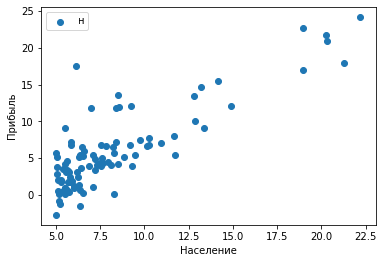

In [225]:
plt.scatter(X,y)
plt.xlabel('Население')
plt.ylabel('Прибыль')
plt.legend('нас')
plt.show()

In [224]:
plt.show()

In [227]:

theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X))


In [228]:
theta

array([[0.],
       [0.]])

In [229]:
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [230]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [231]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCost(X, y, theta)
print(J)


1    32.072734
dtype: float64


In [232]:
np.dot


<function numpy.dot>

In [233]:
X


array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [234]:
y

1
0   17.59200
1    9.13020
2   13.66200
3   11.85400
4    6.82330
..       ...
92   7.20290
93   1.98690
94   0.14454
95   9.05510
96   0.61705

[97 rows x 1 columns]

In [235]:
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [236]:
J = computeCost (X, y, theta) 
print (J)

1    4.483388
dtype: float64


In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [241]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [245]:
data = pd.read_csv("svm-data.csv", header = None)

In [246]:
data

0     1     2
0  0.0  0.70  0.29
1  1.0  0.23  0.55
2  0.0  0.72  0.42
3  0.0  0.98  0.68
4  0.0  0.48  0.39
5  1.0  0.34  0.73
6  0.0  0.44  0.06
7  1.0  0.40  0.74
8  0.0  0.18  0.18
9  1.0  0.53  0.53

In [247]:
y = data.iloc[:,:1]

In [248]:
y

0
0  0.0
1  1.0
2  0.0
3  0.0
4  0.0
5  1.0
6  0.0
7  1.0
8  0.0
9  1.0

In [249]:
X = data.iloc[:,1:]

In [250]:
X

1     2
0  0.70  0.29
1  0.23  0.55
2  0.72  0.42
3  0.98  0.68
4  0.48  0.39
5  0.34  0.73
6  0.44  0.06
7  0.40  0.74
8  0.18  0.18
9  0.53  0.53

In [252]:
clf = SVC(C=100000, random_state=241,kernel='linear')

In [253]:
clf.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=241,
    shrinking=True, tol=0.001, verbose=False)

In [254]:
clf.predict(X)

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 1.])

In [259]:
clf.support_(clf.predict(X))


TypeError: 'numpy.ndarray' object is not callable

In [260]:
clf.support_

array([3, 4, 9])

In [261]:
print(clf.support_)

[3 4 9]


In [262]:
from sklearn import datasets

newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )

In [263]:
pd

<module 'pandas' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [264]:
newsgroupssgroups

NameError: name 'newsgroupssgroups' is not defined

In [265]:
newsgroups

{'data': ['From: 9051467f@levels.unisa.edu.au (The Desert Brat)\nSubject: Re: Keith Schneider - Stealth Poster?\nOrganization: Cured, discharged\nLines: 24\n\nIn article <1pa0f4INNpit@gap.caltech.edu>, keith@cco.caltech.edu (Keith Allan Schneider) writes:\n\n> But really, are you threatened by the motto, or by the people that use it?\n\nEvery time somone writes something and says it is merely describing the norm,\nit is infact re-inforcing that norm upon those programmed not to think for\nthemselves. The motto is dangerous in itself, it tells the world that every\n*true* American is god-fearing, and puts down those who do not fear gods. It\ndoesn\'t need anyone to make it dangerous, it does a good job itself by just\nexisting on your currency.\n\n> keith\n\nThe Desert Brat\n-- \nJohn J McVey, Elc&Eltnc Eng, Whyalla, Uni S Australia,    ________\n9051467f@levels.unisa.edu.au      T.S.A.K.C.            \\/Darwin o\\\nFor replies, mail to whjjm@wh.whyalla.unisa.edu.au      /\\________/\nD

In [270]:
newsgroups.data

['From: 9051467f@levels.unisa.edu.au (The Desert Brat)\nSubject: Re: Keith Schneider - Stealth Poster?\nOrganization: Cured, discharged\nLines: 24\n\nIn article <1pa0f4INNpit@gap.caltech.edu>, keith@cco.caltech.edu (Keith Allan Schneider) writes:\n\n> But really, are you threatened by the motto, or by the people that use it?\n\nEvery time somone writes something and says it is merely describing the norm,\nit is infact re-inforcing that norm upon those programmed not to think for\nthemselves. The motto is dangerous in itself, it tells the world that every\n*true* American is god-fearing, and puts down those who do not fear gods. It\ndoesn\'t need anyone to make it dangerous, it does a good job itself by just\nexisting on your currency.\n\n> keith\n\nThe Desert Brat\n-- \nJohn J McVey, Elc&Eltnc Eng, Whyalla, Uni S Australia,    ________\n9051467f@levels.unisa.edu.au      T.S.A.K.C.            \\/Darwin o\\\nFor replies, mail to whjjm@wh.whyalla.unisa.edu.au      /\\________/\nDisclaimer

In [273]:
newsgroups.target

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [268]:
size(newsgroups.target)

NameError: name 'size' is not defined

In [269]:
np.size(newsgroups.target)

1786

In [274]:
newsgroups.data

['From: 9051467f@levels.unisa.edu.au (The Desert Brat)\nSubject: Re: Keith Schneider - Stealth Poster?\nOrganization: Cured, discharged\nLines: 24\n\nIn article <1pa0f4INNpit@gap.caltech.edu>, keith@cco.caltech.edu (Keith Allan Schneider) writes:\n\n> But really, are you threatened by the motto, or by the people that use it?\n\nEvery time somone writes something and says it is merely describing the norm,\nit is infact re-inforcing that norm upon those programmed not to think for\nthemselves. The motto is dangerous in itself, it tells the world that every\n*true* American is god-fearing, and puts down those who do not fear gods. It\ndoesn\'t need anyone to make it dangerous, it does a good job itself by just\nexisting on your currency.\n\n> keith\n\nThe Desert Brat\n-- \nJohn J McVey, Elc&Eltnc Eng, Whyalla, Uni S Australia,    ________\n9051467f@levels.unisa.edu.au      T.S.A.K.C.            \\/Darwin o\\\nFor replies, mail to whjjm@wh.whyalla.unisa.edu.au      /\\________/\nDisclaimer

In [275]:
X = newsgroups.data

In [276]:
y = newsgroups.target

In [277]:
X

['From: 9051467f@levels.unisa.edu.au (The Desert Brat)\nSubject: Re: Keith Schneider - Stealth Poster?\nOrganization: Cured, discharged\nLines: 24\n\nIn article <1pa0f4INNpit@gap.caltech.edu>, keith@cco.caltech.edu (Keith Allan Schneider) writes:\n\n> But really, are you threatened by the motto, or by the people that use it?\n\nEvery time somone writes something and says it is merely describing the norm,\nit is infact re-inforcing that norm upon those programmed not to think for\nthemselves. The motto is dangerous in itself, it tells the world that every\n*true* American is god-fearing, and puts down those who do not fear gods. It\ndoesn\'t need anyone to make it dangerous, it does a good job itself by just\nexisting on your currency.\n\n> keith\n\nThe Desert Brat\n-- \nJohn J McVey, Elc&Eltnc Eng, Whyalla, Uni S Australia,    ________\n9051467f@levels.unisa.edu.au      T.S.A.K.C.            \\/Darwin o\\\nFor replies, mail to whjjm@wh.whyalla.unisa.edu.au      /\\________/\nDisclaimer

In [278]:
y

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [279]:
np.size(y)

1786

In [280]:
import sklearn.feature_extraction.text.TfidfVectorizer

ModuleNotFoundError: No module named 'sklearn.feature_extraction.text.TfidfVectorizer'; 'sklearn.feature_extraction.text' is not a package

In [281]:
import sklearn.feature_extraction.text.TfidfVectorizer 

ModuleNotFoundError: No module named 'sklearn.feature_extraction.text.TfidfVectorizer'; 'sklearn.feature_extraction.text' is not a package

In [282]:
import sklearn


In [283]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [284]:
vectorizer  = TfidfVectorizer()

In [285]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [286]:
vectorizer.fit_transform(X)

<1786x28382 sparse matrix of type '<class 'numpy.float64'>'
	with 303138 stored elements in Compressed Sparse Row format>

In [292]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
grid = {'C': np.power(10.0, np.arange(-5, 6))}
cv = KFold(y.size, n_folds=1, shuffle=True, random_state=241)
clf = svm.SVC(kernel='linear', random_state=241)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(X, y)

TypeError: __init__() got an unexpected keyword argument 'n_folds'

cv = KFold(np.size(y),n_folds=5,shuffle=True, random_state=241)

In [306]:
cv = KFold(10,n_splits=2,shuffle=True, random_state=241)

TypeError: __init__() got multiple values for argument 'n_splits'

In [304]:
grid = {'C': np.power(10.0, np.arange(-5, 6))}
cv = KFold(y.size, n_splits=5, shuffle=True, random_state=241)
model = SVC(kernel='linear', random_state=241)
gs = grid_search.GridSearchCV(model, grid, scoring='accuracy', cv=cv)
gs.fit(vectorizer.transform(X), y)

TypeError: __init__() got multiple values for argument 'n_splits'

In [301]:
vectorizer.predict(X)

AttributeError: 'TfidfVectorizer' object has no attribute 'predict'

In [307]:
from sklearn.cross_validation import KFold

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [308]:
from sklearn.model_selection import KFold

In [309]:
KFold()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


KFold(n_splits=3, random_state=None, shuffle=False)

In [310]:
cv = KFold(random_state=241,shuffle=True,n_splits=5)

In [311]:
grid = {'C':np.power(10.0,np.arange(-5,6))}

In [312]:
model = SVC(kernel='linear', random_state=241)

In [313]:
gs = grid_search.GridSearchCV(model, grid, scoring='accuracy', cv=cv)

NameError: name 'grid_search' is not defined

In [314]:
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)


In [346]:
gs.fit(vectorizer.transform(X),y)


0.9932810750279956


In [353]:
import sklearn
print(gs.best_index_)
C = gs.best_params_['C']
print(C)

5
1.0


In [354]:
clf = SVC(kernel='linear',C=C,random_state=241)

In [357]:
clf.fit(vectorizer.transform(X),y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=241,
    shrinking=True, tol=0.001, verbose=False)

In [363]:
df = clf.predict(vectorizer.transform(X))

In [376]:
df

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [381]:
coefs = abs(clf.coef_.todense().A1)
coefs = np.argsort(coefs)

In [384]:
np.size(coefs)

28382

In [385]:
coefs

array([ 7801, 21437,  9144, ...,  5088, 12871, 24019], dtype=int64)

In [389]:
a = coefs.sort()

In [394]:
vec = TfidfVectorizer()


In [395]:
vec.fit_transform(a)
words = vectorizer.get_feature_names()


TypeError: 'NoneType' object is not iterable

In [392]:
words

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '000021',
 '000050',
 '000062david42',
 '000406',
 '000410',
 '00041032',
 '0004136',
 '00041555',
 '0004244402',
 '0004246',
 '00043819',
 '0004422',
 '00044513',
 '00044808',
 '00044939',
 '0004651657',
 '0004847546',
 '0004988',
 '0005',
 '0005169',
 '0008512',
 '00090711',
 '000th',
 '001125',
 '0011265',
 '0012',
 '001326',
 '00140',
 '001428',
 '001442',
 '001555',
 '001718',
 '001757',
 '0018',
 '0020',
 '0022',
 '002214',
 '002341',
 '0028',
 '0029',
 '0033',
 '0034',
 '003719',
 '004119',
 '004311',
 '004405',
 '006',
 '0065',
 '0098',
 '00pm',
 '01',
 '010',
 '0100',
 '0100lines',
 '010116',
 '010326',
 '010821',
 '010847',
 '011255',
 '012536',
 '013034',
 '013423tan102',
 '013657',
 '014305',
 '014506',
 '014554',
 '01463',
 '015',
 '015922',
 '015931',
 '01609',
 '01776',
 '01826',
 '018b',
 '0192',
 '0195',
 '01wb',
 '02',
 '020021',
 '020259',
 '020359',
 '020504',
 '020546',
 '020701tan102',
 '02115',
 '02138',
 '02139',
 '0

In [428]:
df2 = pd.DataFrame( np.transpose(clf
                                     .coef_.toarray(), index=np.asarray(vectorizer.get_feature_names()) , columns=["col1"])

SyntaxError: unexpected EOF while parsing (<ipython-input-428-a7a68b5fdec6>, line 2)

In [451]:
dfdf = abs(df2.values)
dfdf.sort()
np.size(dfdf)
dfdf[1]

array([0.12314757])

In [408]:
words = vectorizer.get_feature_names()
coef = pd.DataFrame(clf.coef_.data, clf.coef_.indices)
top_words = coef[0].map(lambda w: abs(w)).sort_values(ascending=False).head(10).index.map(lambda i: words[i])
top_words.sort_values()
print('kek')
print(top_words)

kek
Index(['space', 'god', 'atheism', 'atheists', 'moon', 'sky', 'religion',
       'bible', 'keith', 'sci'],
      dtype='object')


166

In [456]:
import pandas as pd

import numpy as np

from sklearn import datasets

newsgroups=datasets.fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space'])

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()

X=vectorizer.fit_transform(newsgroups.data)

y=newsgroups.target

from sklearn.svm import SVC

from sklearn.model_selection import KFold

kf=KFold(n_splits=5, shuffle=True, random_state=241)

from sklearn.model_selection import GridSearchCV

grid={'C':np.power(10.0,np.arange(-5,6))}

clf=SVC(kernel='linear',random_state=241)

gs=GridSearchCV(clf,grid, scoring='accuracy',cv=kf)

gs.fit(X,y)

for a in gs.best_params_:

    print(a.mean_validation_score)

    print(a.parameters)

clf2=SVC(kernel='linear',C=1.0, random_state=241)

clf2.fit(X,y)

coef=clf2.coef_

q=pd.DataFrame(coef.toarray()).transpose()

top10=abs(q).sort_values([0], ascending=False).head(10)

indices=[]

indices=top10.index

words=[]

for i in indices:

    feature_mapping=vectorizer.get_feature_names()

    words.append(feature_mapping[i])

print(sorted(words))

AttributeError: 'str' object has no attribute 'mean_validation_score'

In [ ]:
import pandas as pd

import numpy as np

from sklearn import datasets

newsgroups=datasets.fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space'])

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()

X=vectorizer.fit_transform(newsgroups.data)

y=newsgroups.target

from sklearn.svm import SVC

from sklearn.model_selection import KFold

kf=KFold(n_splits=5, shuffle=True, random_state=241)

from sklearn.model_selection import GridSearchCV

grid={'C':np.power(10.0,np.arange(-5,6))}

clf=SVC(kernel='linear',random_state=241)

gs=GridSearchCV(clf,grid, scoring='accuracy',cv=kf)

gs.fit(X,y)

In [459]:
a = gs.best_params_['C']

In [460]:
a

1.0

In [461]:
clf2=SVC(kernel='linear',C=1.0, random_state=241)

clf2.fit(X,y)

coef=clf2.coef_

q=pd.DataFrame(coef.toarray()).transpose()

top10=abs(q).sort_values([0], ascending=False).head(10)

indices=[]

indices=top10.index

words=[]

for i in indices:

    feature_mapping=vectorizer.get_feature_names()

    words.append(feature_mapping[i])

print(sorted(words))

['atheism', 'atheists', 'bible', 'god', 'keith', 'moon', 'religion', 'sci', 'sky', 'space']
